## <b> I.D Card Tampering Detection </b>

This project was done to detect tampering of I.D Card using Computer Vision. An application of this project in the real world is the ability of organisations to tell it the I.D Card provided to them by individuals is legit or not.

Here, we will calculate the structural similarity of an original I.D Card and the I.D Card uploaded by a user

In [1]:
from skimage.metrics import structural_similarity
import imutils
import cv2  as cv
from PIL import Image
import requests
import matplotlib.pyplot as plt

### Displaying images of both I.D Cards

In [5]:
from urllib import request

def load_image(img_path):
    if 'https' in img_path:
        response = requests.get(img_path, stream=True).raw
        image = Image.open(response)
    else:
       image = Image.open(img_path)
    return image

original = load_image('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg')
tampered = load_image('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png')

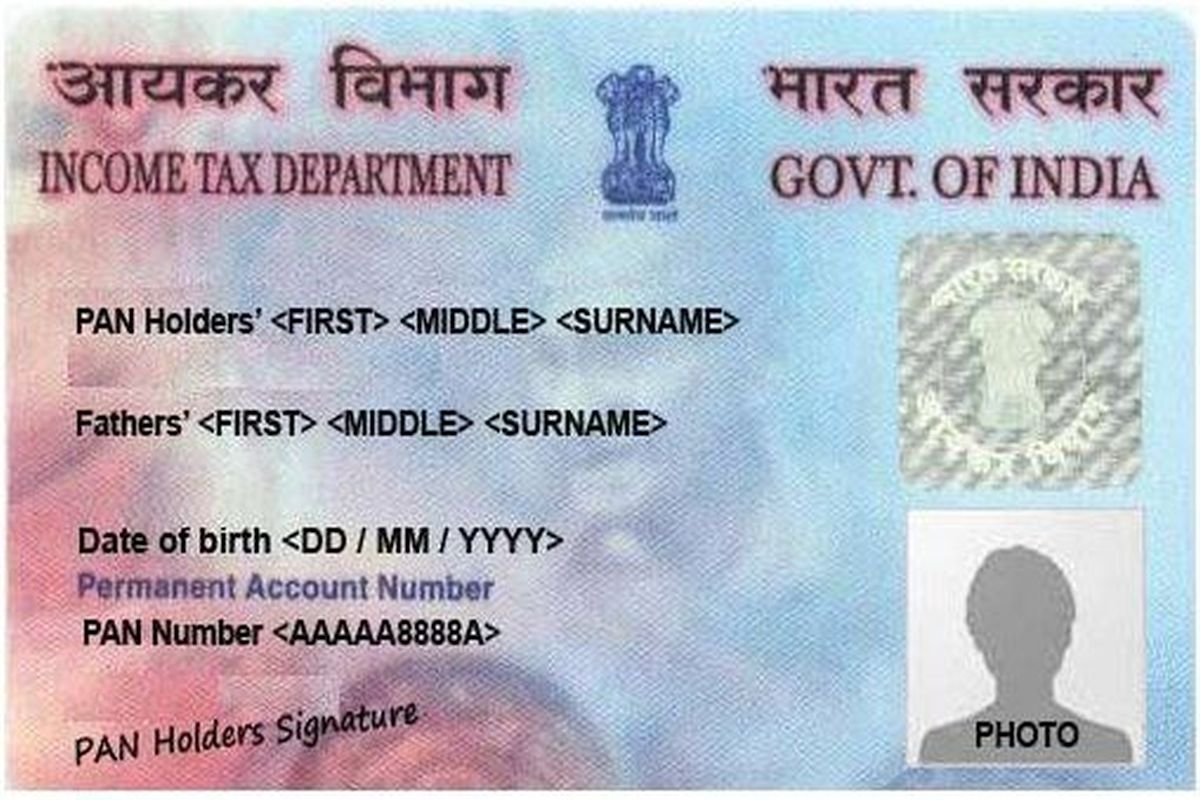

In [6]:
original

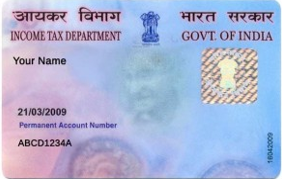

In [7]:
tampered

### Calculating the Structural Similarity score

Loading original and user provided images

In [5]:
# The file format of thesource file
print("Original image format:", original.format)
print("Tampered image format:", tampered.format)

# Image size, in pixels. The size is given as a 2-tuple (width, height)
print("Original image size:", original.size)
print("Tampered image size:", tampered.size)

Original image format: JPEG
Tampered image format: PNG
Original image size: (1200, 800)
Tampered image size: (282, 179)


Converting the format of tampered image similar to original image

In [6]:
# Resize Image
original = original.resize((250, 150))
original.save('original.png')
tampered = tampered.resize((250,150))
tampered.save('tampered.png')

Reading images using opencv and convert to grayscale

In [7]:
original = cv.imread('original.png')
original_gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

tampered = cv.imread('tampered.png')
tampered_gray = cv.cvtColor(tampered, cv.COLOR_BGR2GRAY)
original_gray.shape, tampered_gray.shape

((150, 250), (150, 250))

Structural similarity index helps us determine exactly where the image differences are. The lower the score, the lower the similarity

In [8]:
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype('uint8')
print(f'SSIM: {score}')

SSIM: 0.3145242631461133


### Visualising the Differences Between Both Images

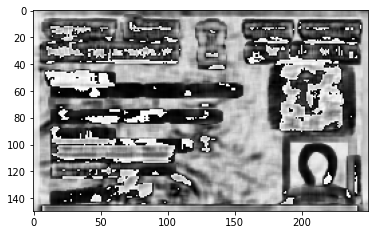

In [16]:
plt.imshow(diff, cmap='gray')

# The black portions show the different parts

Here, we use the threshold function to apply an adaptive threshold to the image, converting it to a binary image.

Then we get the contours on the binary image. The contours will be used for shape analysis and recognition.

In [12]:
# Calculating the threshold and contours
thresh = cv.threshold(diff, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Bounding rectangle helps to get the width to height ratio of the object. We compute the bounding box of the contour and then draw the bounding 

In [13]:
# Loop over the contours
for c in cnts:
    (x, y, w, h) = cv.boundingRect(c)
    cv.rectangle(original, (x, y), (x+w, y+h), (0,0,255), 2)
    cv.rectangle(tampered, (x, y), (x+w, y+h), (0,0,255), 2)

Original Format Image


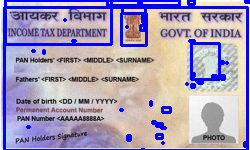

In [14]:
# Display original image wiith contour
print('Original Format Image')
Image.fromarray(original)

Tampered Format Image


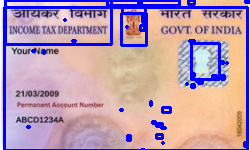

In [15]:
# Display tampered image wiith contour
print('Tampered Format Image')
Image.fromarray(tampered)

Thresh Format Image


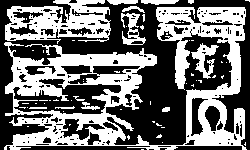

In [17]:
# Display thresh image wiith contour
print('Thresh Format Image')
Image.fromarray(thresh)

# Here we can see the difference between both images is very high

### Summary

Getting the structural similarity of the images helped us to detect how dissimilar the I.D Cards are. Also, carrying out visual exploration helped out in visual analysis and recognition of spatial zones with difference in both images.

With an SSIM (Structural Similarity score) of ~0.314, we can say that the I.D provided was tampered, with a lot of text and pictorial information missing.

The use of this project may be extended to different organisations where employees, customers, and also consumers of products need to provide I.D to employ a certain service. The organisation in question can confidently detect if the I.D provided is fake or not.